<a href="https://colab.research.google.com/github/Wilson30678tw/Computer-Vision-Project/blob/main/Modify_FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from google.colab import drive

drive.mount('/content/drive')

base_dir = '/content/drive/MyDrive/IAT360/FaceDetectionDataset/images'

data_yaml = f"""
train: {base_dir}/train
val: {base_dir}val

nc: 1
names: ['face']
"""

yaml_path = os.path.join(base_dir, 'data.yaml')
with open(yaml_path, 'w') as f:
    f.write(data_yaml)

Mounted at /content/drive


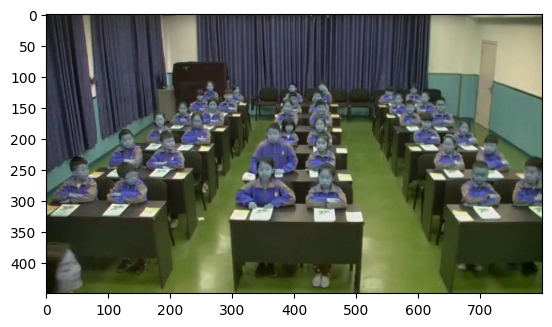

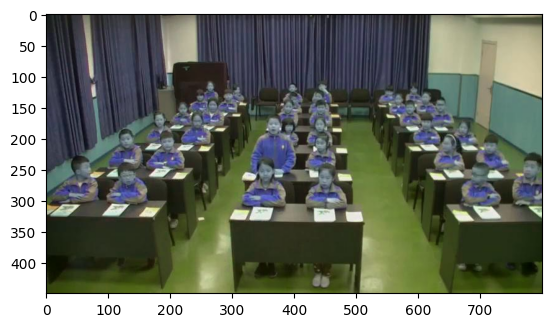

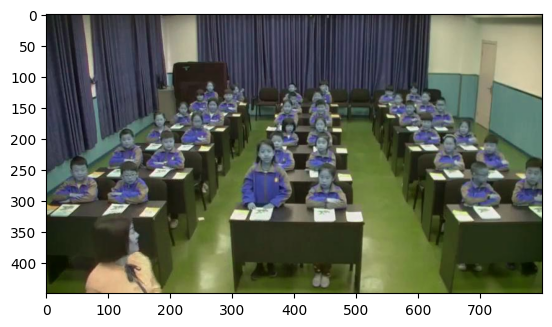

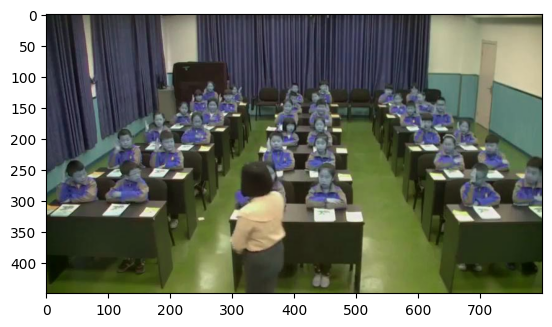

In [3]:
import cv2
import matplotlib.pyplot as plt

#visualize first four sample images from train data
for idx, image in enumerate(os.listdir(os.path.join(base_dir, "train"))):
    img = cv2.imread(os.path.join(base_dir,"train", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

In [4]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


In [20]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

In [26]:
from ultralytics import YOLO
import os
os.makedirs('/content/drive/MyDrive/model_direct', exist_ok=True)


model = YOLO('yolov8n.pt')

#model.tune(data="coco8.yaml", epochs=30, iterations=300, optimizer="AdamW", imgsz=640)

model.train(
    data='/content/drive/MyDrive/IAT360/FaceDetectionDataset/data.yaml',
     epochs=50 ,
     lr0=0.001 ,

)

model.save('/content/drive/MyDrive/model_direct/yolov8_trained_model.pt')

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/IAT360/FaceDetectionDataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

train: Scanning /content/drive/My Drive/IAT360/FaceDetectionDataset/labels/train.cache... 330 images, 0 backgrounds, 0 corrupt: 100%|██████████| 330/330 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/train/141.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/train/186.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/train/223.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/My Drive/IAT360/FaceDetectionDataset/labels/val.cache... 230 images, 16 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/val/158.jpg: 1 duplicate labels removed


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.13G      1.577      2.447      1.208        650        640: 100%|██████████| 21/21 [00:15<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all        230       6366     0.0901      0.977      0.803      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.41G      1.045     0.8305     0.9355        504        640: 100%|██████████| 21/21 [00:08<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        230       6366      0.844      0.558      0.694      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       3.3G     0.9213     0.6819     0.9001        505        640: 100%|██████████| 21/21 [00:07<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.57it/s]


                   all        230       6366      0.822      0.737      0.815      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.21G      0.849     0.6279     0.8839        535        640: 100%|██████████| 21/21 [00:12<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.45it/s]

                   all        230       6366      0.833      0.432      0.591      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.98G     0.7938     0.5959     0.8804        613        640: 100%|██████████| 21/21 [00:08<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        230       6366      0.827      0.334      0.402      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.12G     0.8407     0.5883     0.8877        622        640: 100%|██████████| 21/21 [00:08<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.17it/s]


                   all        230       6366      0.849      0.324      0.394       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.62G     0.8062     0.5596     0.8751        747        640: 100%|██████████| 21/21 [00:11<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]


                   all        230       6366      0.783       0.35      0.427      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.45G      0.794      0.554     0.8767        552        640: 100%|██████████| 21/21 [00:07<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        230       6366      0.699       0.47      0.577      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.16G     0.7626     0.5238     0.8634        685        640: 100%|██████████| 21/21 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]


                   all        230       6366      0.618      0.522      0.614      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.25G     0.7445     0.5234     0.8671        591        640: 100%|██████████| 21/21 [00:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]


                   all        230       6366      0.906      0.315      0.405       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.09G     0.7489     0.5131     0.8635        552        640: 100%|██████████| 21/21 [00:09<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all        230       6366      0.891      0.328      0.399      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.99G     0.7091     0.4865      0.859        487        640: 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]

                   all        230       6366      0.681      0.558      0.659      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.21G     0.7175     0.4836     0.8578       1037        640:  48%|████▊     | 10/21 [00:05<00:06,  1.76it/s]


KeyboardInterrupt: 

In [14]:
# from ultralytics import YOLO

# model = YOLO('/content/drive/MyDrive/model_direct/yolov8_trained_model.pt')

In [22]:
#model = YOLO('/content/drive/MyDrive/model_direct/yolov8_trained_model.pt')
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/My Drive/IAT360/FaceDetectionDataset/labels/val.cache... 230 images, 16 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/val/158.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:18<00:00,  1.23s/it]


                   all        230       6366      0.826      0.739      0.816      0.488
Speed: 0.8ms preprocess, 6.4ms inference, 0.0ms loss, 11.1ms postprocess per image
Results saved to runs/detect/train42


0.7386113729186302

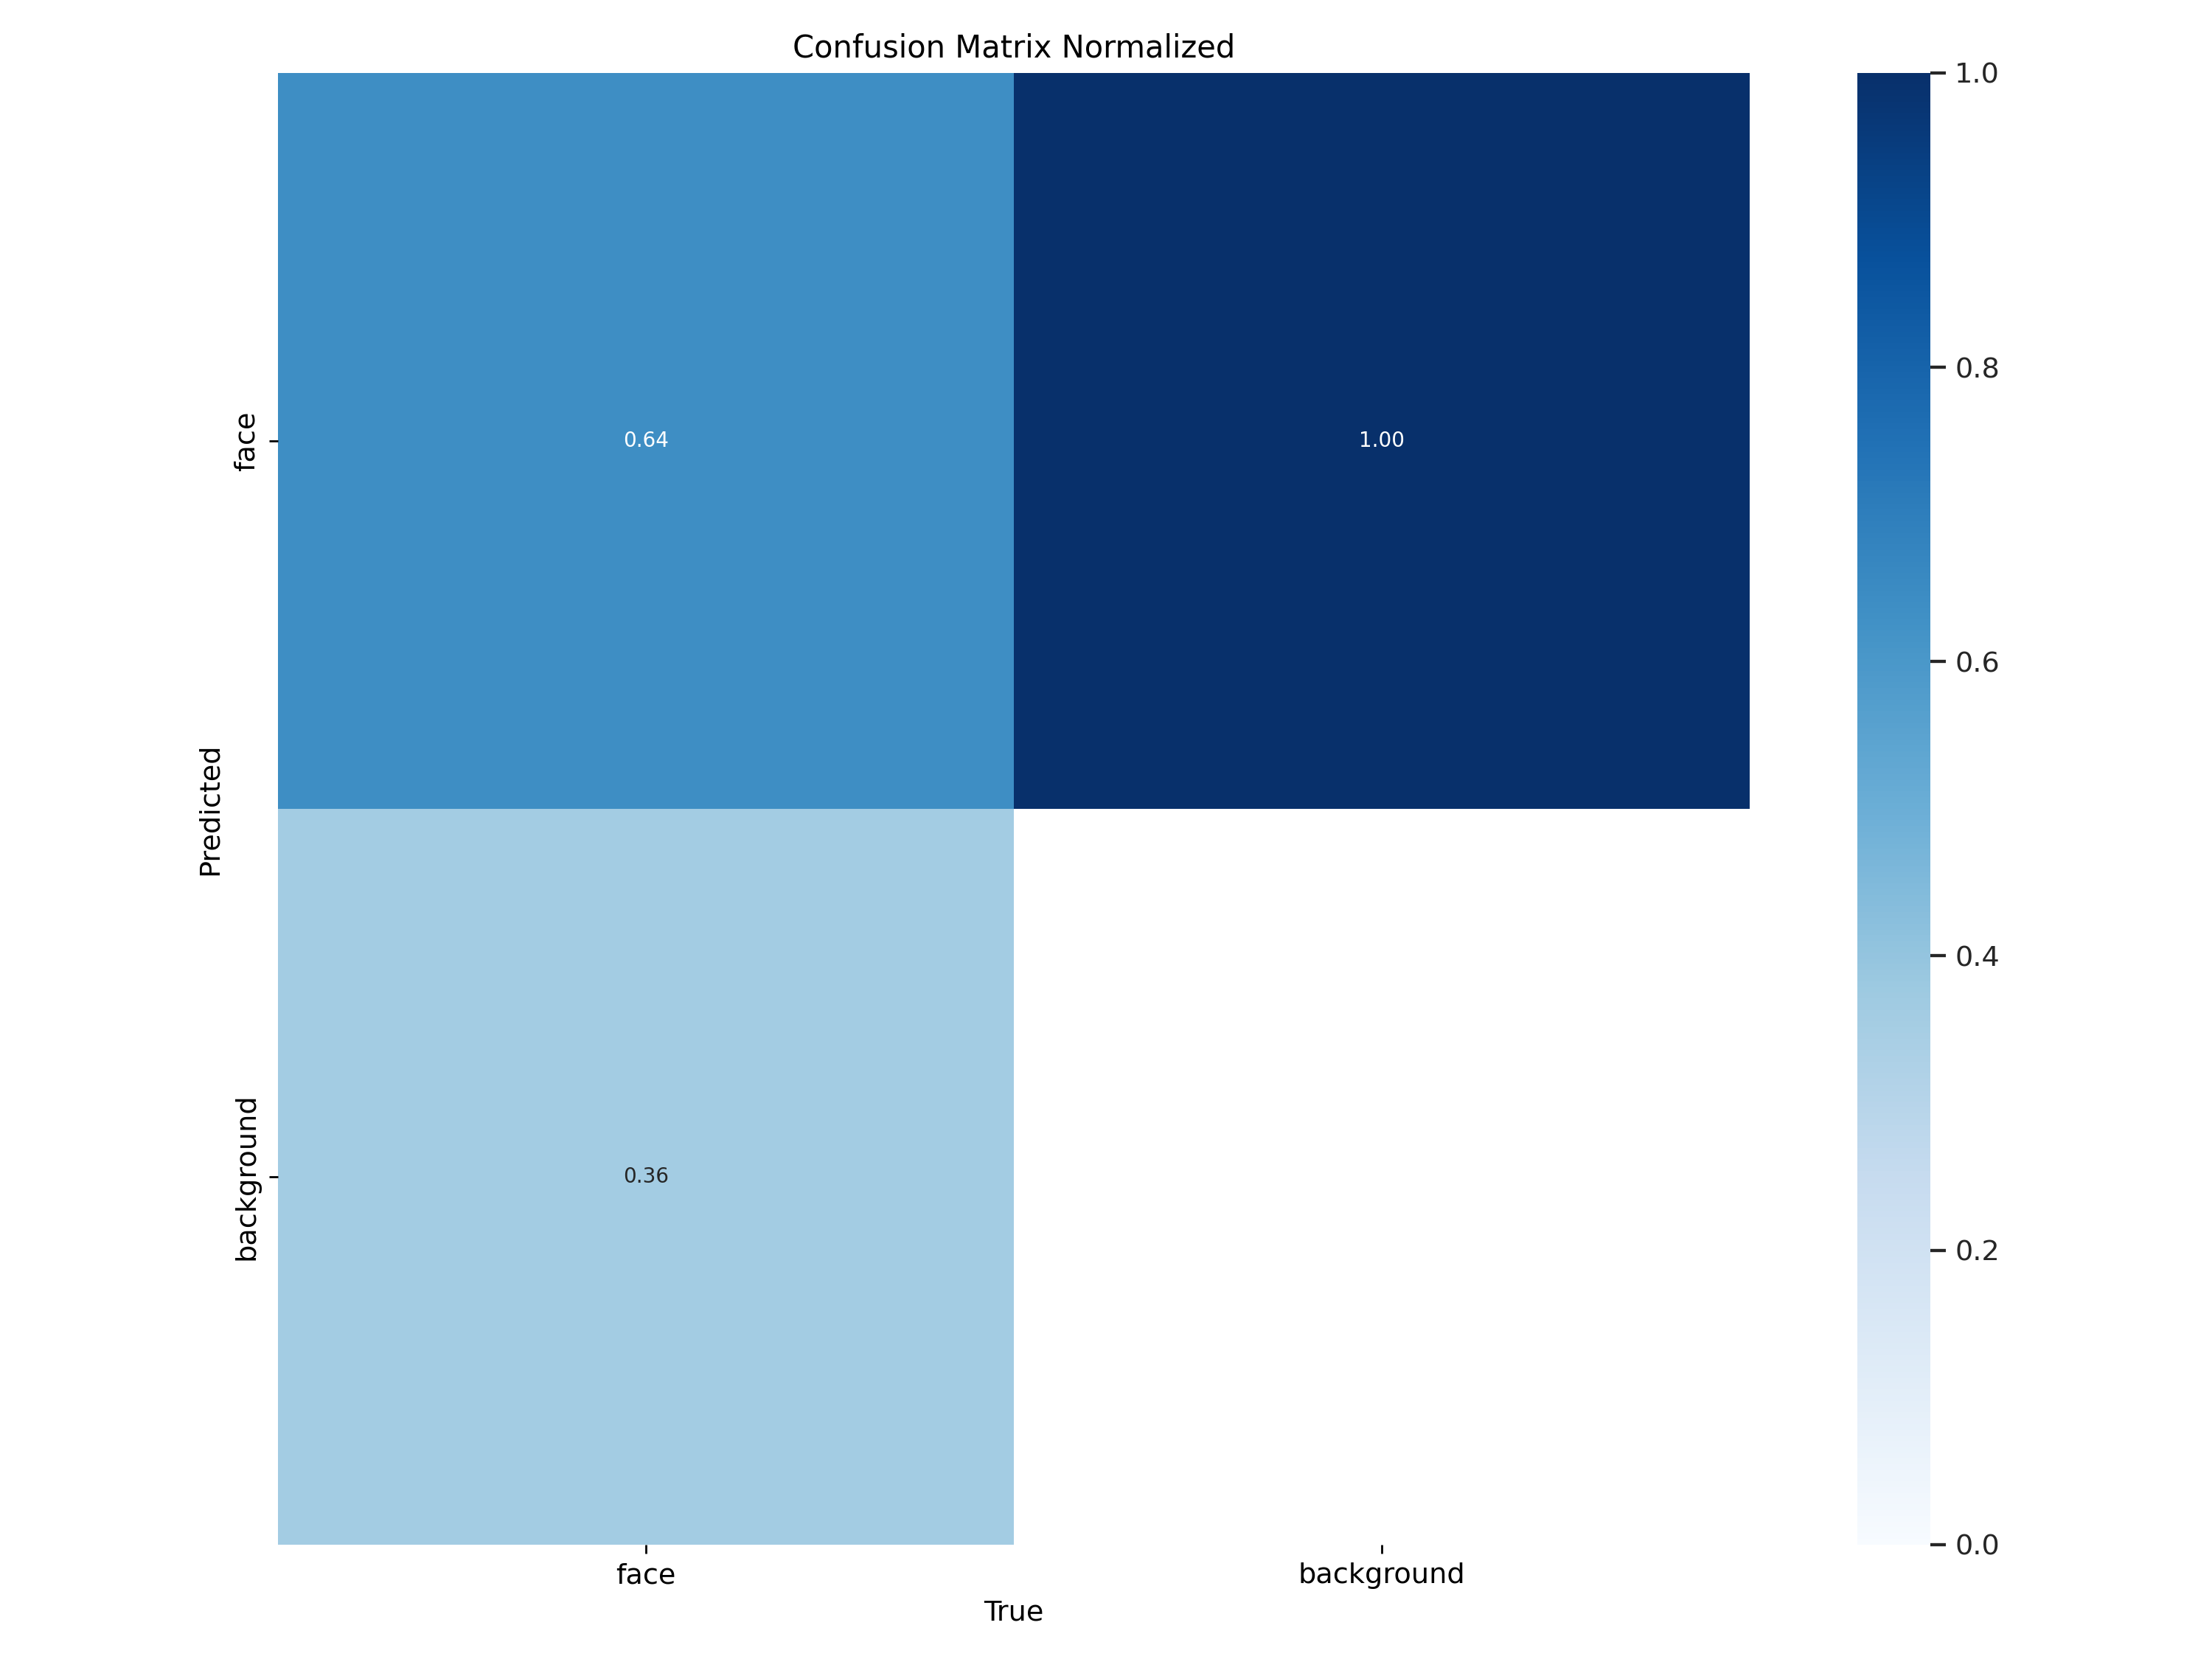

In [27]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train42/confusion_matrix_normalized.png')

100%|██████████| 87.5k/87.5k [00:01<00:00, 83.2kB/s]

image 1/1 /content/5153d120e85d412b8dc827b104668d12.jpeg: 608x640 15 faces, 44.3ms
Speed: 3.7ms preprocess, 44.3ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 640)


检测到的人脸数量: 15


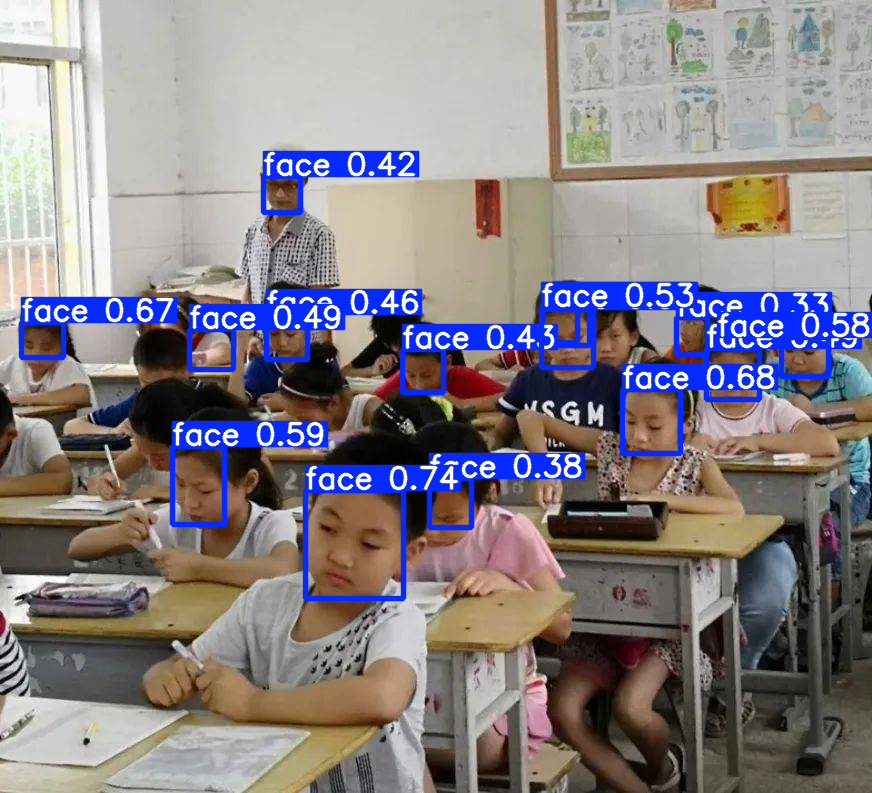

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

imagePath = 'https://p5.itc.cn/images01/20231123/5153d120e85d412b8dc827b104668d12.jpeg'

results = model.predict(source=imagePath)

face_count = 0
# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show (doesn't work on colab)
    im.save('results.jpg')  # save image
    face_count += len(r.boxes.xyxy)

print("Number of detected faces:", face_count)

#show image directly
from google.colab.patches import cv2_imshow
cv2_imshow(im_array)